In [298]:
""" Dataset utilizado para la regresión Lineal: Vehicle Dataset
Contiene información técnica y de mercado de automóviles.
El objetivo es predecir el precio del automóvil en función de sus atributos.

La columnas de los archivos de nombran iguales para faciliar la identificación de columnas"""

' Dataset utilizado para la regresión Lineal: Vehicle Dataset\nContiene información técnica y de mercado de automóviles.\nEl objetivo es predecir el precio del automóvil en función de sus atributos.\n\nLa columnas de los archivos de nombran iguales para faciliar la identificación de columnas'

In [299]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Se ingresa la ruta de los 4 archivos
file_paths = ["./car data.csv", "./CAR DETAILS FROM CAR DEKHO.csv", "./Car details v3.csv", "./car details v4.csv"]

# Se cargan los datos
data_frames = [pd.read_csv(file) for file in file_paths]

# Verificar las dimensiones de los datos
for i, df in enumerate(data_frames):
    print(f"Dimensiones del archivo {i + 1}: {df.shape}")

# Unir los Dataset a lo largo del eje de las filas
data = pd.concat(data_frames, axis=0)

# Verificar las dimensiones del Dataset resultante
print("Dimensiones del Dataset unido:", data.shape)


Dimensiones del archivo 1: (301, 9)
Dimensiones del archivo 2: (4340, 8)
Dimensiones del archivo 3: (8128, 13)
Dimensiones del archivo 4: (2059, 20)
Dimensiones del Dataset unido: (14828, 24)


In [300]:
# Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Mostrar una muestra aleatoria de filas del Dataset
sample_data = data.sample(min(100, len(data)))  # Muestra aleatoria de hasta 100 filas
sample_data

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,...,Model,Location,Color,Seller Type,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity
4761,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,960000.00,NaN,42000,Diesel,Dealer,Manual,First Owner,23.0 kmpl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,Maruti Ritz VXi,2014,350000.00,NaN,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Royal Enfield Thunder 500,2013,1.05,1.9,5400,Petrol,Individual,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,Maruti Ertiga ZDI,2013,600000.00,NaN,60000,Diesel,Individual,Manual,First Owner,20.77 kmpl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,Maruti Omni E 8 Str STD,2005,105000.00,NaN,59635,Petrol,Dealer,Manual,Second Owner,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,city,2006,2.10,7.6,50456,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,Hyundai,2017,675000.00,NaN,48591,Petrol,NaN,Manual,First,NaN,...,Elite i20 Asta 1.2,Hyderabad,White,Individual,115 Nm @ 4000 rpm,FWD,3985.0,1734.0,1505.0,45.0
6260,Hyundai Xcent 1.1 CRDi SX Option,2018,665000.00,NaN,40142,Diesel,Dealer,Manual,First Owner,24.4 kmpl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,Honda,2010,325000.00,NaN,56000,Petrol,NaN,Automatic,First,NaN,...,City 1.5 V AT,Delhi,Gold,Individual,146@4600,FWD,4420.0,1695.0,1480.0,42.0


In [301]:
data.describe()  # Muestra estadísticas descriptivas

,Year,Selling_Price,Present_Price,Kms_Driven,Seats,Length,Width,Height,Fuel Tank Capacity
count,14828.000000,1.482800e+04,301.000000,1.482800e+04,9902.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,2013.955692,7.338985e+05,7.628472,6.593197e+04,5.394466,4280.860652,1767.991980,1591.735338,52.002210
std,4.121330,1.195352e+06,8.644115,5.404873e+04,0.934542,442.458507,135.265825,136.073956,15.110198
min,1983.000000,1.000000e-01,0.320000,0.000000e+00,2.000000,3099.000000,1475.000000,1165.000000,15.000000
25%,2012.000000,2.500000e+05,1.200000,3.200000e+04,5.000000,3985.000000,1695.000000,1485.000000,41.250000
50%,2015.000000,4.500000e+05,6.400000,6.000000e+04,5.000000,4370.000000,1770.000000,1545.000000,50.000000
75%,2017.000000,7.150000e+05,9.900000,9.000000e+04,5.000000,4629.000000,1831.500000,1675.000000,60.000000
max,2022.000000,3.500000e+07,92.600000,2.360457e+06,14.000000,5569.000000,2220.000000,1995.000000,105.000000


In [302]:
data.head()    # Muestra las primeras 5 filas del Dataset

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,...,Model,Location,Color,Seller Type,Max Torque,Drivetrain,Length,Width,Height,Fuel Tank Capacity
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
# Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# En el analisis explorarotio se identifico muchos valores Nan, el objetivo es iniciar eliminandolos

# Eliminar las columnas que contengan NaN
data = data.dropna(axis=1)

In [304]:
# Filtra las columnas numéricas
numeric_data = data_clean.select_dtypes(include=[np.number]) 

# Identifica las columnas que contienen al menos un cero
columns_with_zeros = numeric_data.columns[(numeric_data == 0).any()].tolist()

# Solo la columna Kms_Driven tiene valores en cero, pero en este caso es normal que los tenga, serian los autos nuevos. 
print("Columnas numéricas con al menos un cero:", columns_with_zeros)

Columnas numéricas con al menos un cero: ['Kms_Driven']


In [305]:
data.describe()

,Year,Selling_Price,Kms_Driven
count,14828.000000,1.482800e+04,1.482800e+04
mean,2013.955692,7.338985e+05,6.593197e+04
std,4.121330,1.195352e+06,5.404873e+04
min,1983.000000,1.000000e-01,0.000000e+00
25%,2012.000000,2.500000e+05,3.200000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,7.150000e+05,9.000000e+04
max,2022.000000,3.500000e+07,2.360457e+06


In [306]:
# Verificar las dimensiones del Dataset resultante
print("Cambios en el Dataset sin los NaN:", data.shape)


Cambios en el Dataset sin los NaN: (14828, 7)


In [307]:
data

,Name,Year,Selling_Price,Kms_Driven,Fuel,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Manual,0
1,sx4,2013,4.75,43000,Diesel,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Manual,0
4,swift,2014,4.60,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
2054,Mahindra,2016,850000.00,90300,Diesel,Manual,First
2055,Hyundai,2014,275000.00,83000,Petrol,Manual,Second
2056,Ford,2013,240000.00,73000,Petrol,Manual,First
2057,BMW,2018,4290000.00,60474,Diesel,Automatic,First


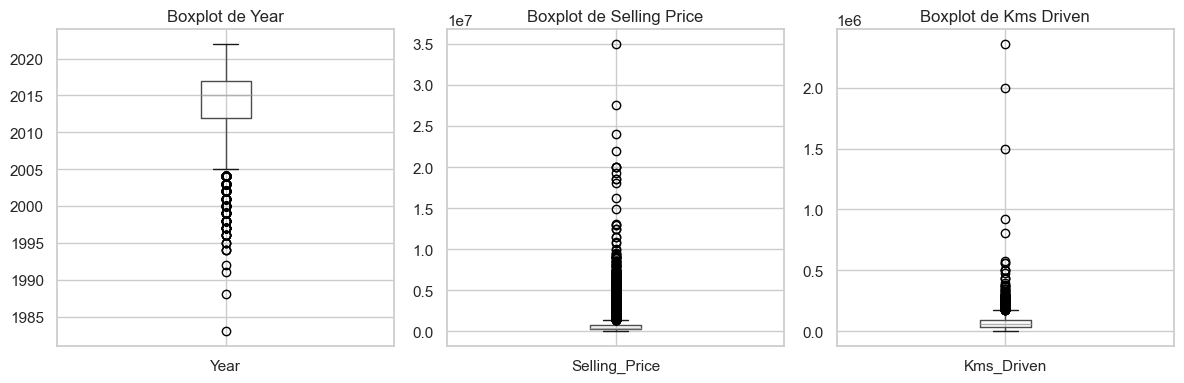

In [308]:
# Identificando datos atipicos 

# Nombres de las columnas para los gráficos de caja
columns = ['Year', 'Selling_Price', 'Kms_Driven']
titles = ['Boxplot de Year', 'Boxplot de Selling Price', 'Boxplot de Kms Driven']

plt.figure(figsize=(12, 4))

# Crear un gráfico de caja para cada columna
for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(1, 3, i)
    data.boxplot(column=column)
    plt.title(title)

plt.tight_layout()
plt.show()


In [309]:
# luego de la visualización se crean los rangos que definen que es atipico o no. 

variables = {
    'Year': (1985, 2020),       
    'Selling_Price': (0, 3000000),   
    'Kms_Driven': (0, 1000000) 
}

# Calcular los datos atípicos

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")


Datos atípicos en Year: 238, 1.61% del total
Datos atípicos en Selling_Price: 594, 4.01% del total
Datos atípicos en Kms_Driven: 3, 0.02% del total


In [310]:
# Borrar lso datos atipicos del dataset

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    data = data[(data[variable] < nivel_maximo) & (data[variable] > nivel_minimo)]

In [311]:
# Calcular los datos atípicos nuevamente, para verificar que fueron eliminados

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")

Datos atípicos en Year: 0, 0.00% del total
Datos atípicos en Selling_Price: 0, 0.00% del total
Datos atípicos en Kms_Driven: 0, 0.00% del total


In [312]:
# De esta forma queda el dataset sin valores atipicos

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13865 entries, 0 to 2058
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           13865 non-null  object 
 1   Year           13865 non-null  int64  
 2   Selling_Price  13865 non-null  float64
 3   Kms_Driven     13865 non-null  int64  
 4   Fuel           13865 non-null  object 
 5   Transmission   13865 non-null  object 
 6   Owner          13865 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 866.6+ KB


In [313]:
# Punto 3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

# Variable dependiente y necesaria para las predicciones. 
data['Selling_Price'].value_counts()
data['Selling_Price'].head(30)

0     3.35
1     4.75
2     7.25
3     2.85
4     4.60
5     9.25
6     6.75
7     6.50
8     8.75
9     7.45
10    2.85
11    6.85
12    7.50
13    6.10
14    2.25
15    7.75
16    7.25
17    7.75
18    3.25
19    2.65
20    2.85
21    4.90
22    4.40
23    2.50
24    2.90
25    3.00
26    4.15
27    6.00
28    1.95
29    7.45
Name: Selling_Price, dtype: float64

In [314]:
#  Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# se realiza Train 80%, Y Test 20%

features = ['Year', 'Kms_Driven']  # Variables independientes
target = 'Selling_Price'           # Variable dependiente

# Preparar los datos de entrada (X) y salida (Y)
X = data[features]  # Datos de entrada solo con las características seleccionadas
Y = data[target]    # Datos de salida (precio de venta)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Mostrar las dimensiones de los conjuntos para verificar su correcta división
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de Y_train:", Y_train.shape)
print("Tamaño de Y_test:", Y_test.shape)

Tamaño de X_train: (11092, 2)
Tamaño de X_test: (2773, 2)
Tamaño de Y_train: (11092,)
Tamaño de Y_test: (2773,)


In [315]:
# Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, Y_train)  # Entrenamiento del modelo

# Realizar predicciones con el modelo entrenado sobre el conjunto de prueba
prediccion = modelo.predict(X_test)


In [316]:
print(Y_test)

4002    650000.0
3714    395000.0
4297    484999.0
2969    408000.0
4056    200000.0
          ...   
3823    350000.0
242          4.4
563     700000.0
817     220000.0
4983    675000.0
Name: Selling_Price, Length: 2773, dtype: float64


In [317]:
print(prediccion)

[647871.22249401 542806.52222852 808111.65914662 ... 810275.98919958
 660150.08480011 815331.99132563]


In [318]:
# Paso 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

r2 = r2_score(Y_test, prediccion)
mse = mean_squared_error(Y_test, prediccion)
mae = mean_absolute_error(Y_test, prediccion)
rmse = mean_squared_error(Y_test, prediccion, squared=False)

print(f"Coeficiente de determinación R^2: {r2:.2f}")
print(f"Error cuadrático medio MSE: {mse:.2f}")
print(f"Error absoluto medio MAE: {mae:.2f}")
print(f"Raíz del error cuadrático medio RMSE: {rmse:.2f}")

Coeficiente de determinación R^2: 0.20
Error cuadrático medio MSE: 170297197713.05
Error absoluto medio MAE: 252955.40
Raíz del error cuadrático medio RMSE: 412670.81


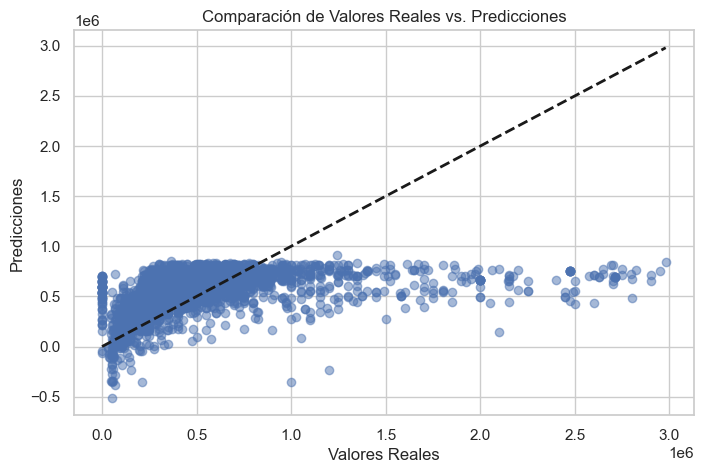

In [319]:
# Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Gráfico de dispersión de los valores reales vs. los predichos

plt.figure(figsize=(8, 5))
plt.scatter(Y_test, prediccion, alpha=0.5)
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Línea ideal
plt.show()

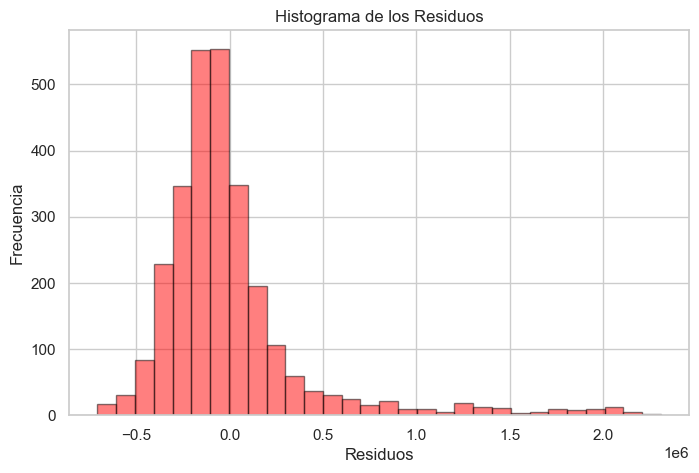

In [320]:
# Historigrama de los residuos

residuos = Y_test - prediccion

plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=30, alpha=0.5, color='red', edgecolor='black')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


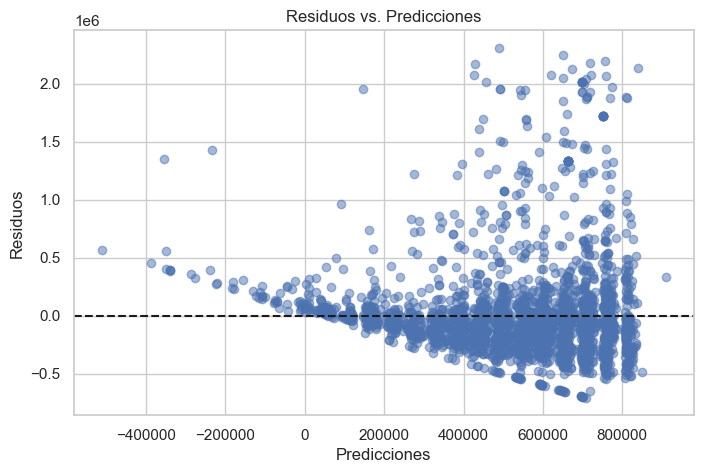

In [321]:
# Grafico de residuos VS predicciones

plt.figure(figsize=(8, 5))
plt.scatter(prediccion, residuos, alpha=0.5)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='k', linestyle='--')  # Línea en y=0
plt.show()


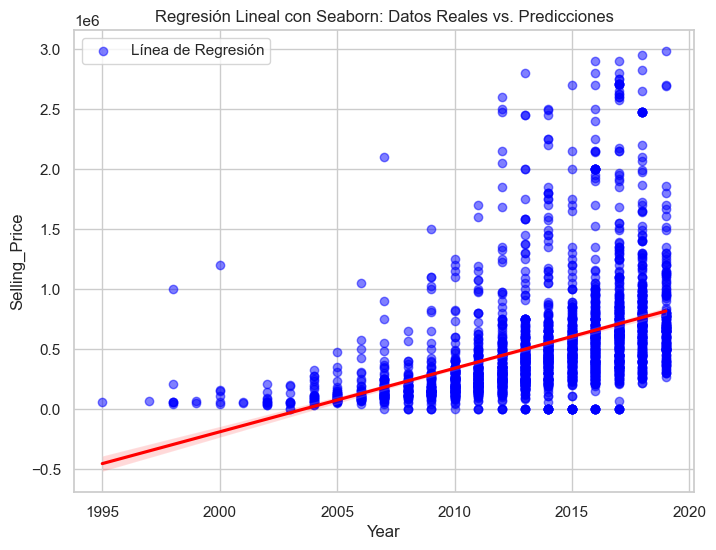

In [322]:
# Gráfico de regresión

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(x=X_test['Year'], y=Y_test, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'}, label='Línea de Regresión')

plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.title('Regresión Lineal con Seaborn: Datos Reales vs. Predicciones')
plt.legend()
plt.show()


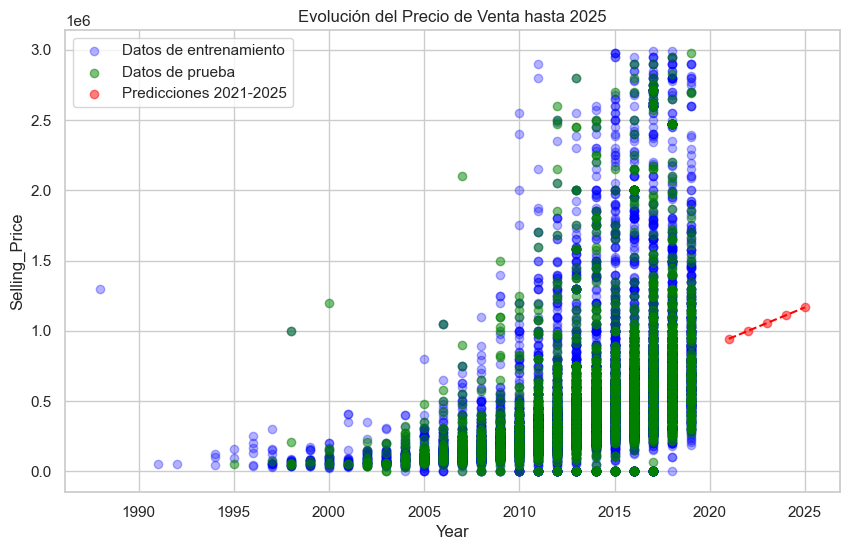

In [323]:
# Predicción desde el 2021 - 205

# Preparar los nuevos datos para predicciones futuras
nuevos_años = pd.DataFrame({'Year': range(2021, 2026), 'Kms_Driven': [X_train['Kms_Driven'].mean()] * 5})
predicciones_2021_2025 = modelo.predict(nuevos_años)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos reales
plt.scatter(X_train['Year'], Y_train, color='blue', label='Datos de entrenamiento', alpha=0.3)
plt.scatter(X_test['Year'], Y_test, color='green', label='Datos de prueba', alpha=0.5)

# Gráfico de dispersión y línea de las predicciones
plt.scatter(nuevos_años['Year'], predicciones_2021_2025, color='red', label='Predicciones 2021-2025', alpha=0.5)
plt.plot(nuevos_años['Year'], predicciones_2021_2025, color='red', linestyle='--')


plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.title('Evolución del Precio de Venta hasta 2025')
plt.legend()
plt.grid(True)
plt.show()
